### Titanic Problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
titanic = pd.read_csv("data/titanic/titanic.csv")

### 1. View the first five rows of the dataset 

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Run describe() to get basic descriptive statistics on the dataset 

In [5]:
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Thomas, Master. Assad Alexander",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3. Are there missing values in the dataset? Run count() to view the number of values for each column. Try info() as well which provides additional information about the dataframe.  

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Our goal is to predict whether a passenger survived on the Titanic. Let's start by building a single variable logistic model to try and predict survivability. 

### 4. Generate a boxplot using Seaborn (sns) to visualize the distribution of fare against survived 

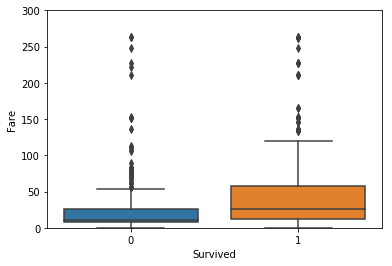

In [4]:
sns.boxplot('Survived', 'Fare', data = titanic)
plt.ylim(0,300)
plt.show()

### 5. Using LogisticRegression from Sklearn, create a logistic regression model predicting survived based on fare (use the default LogisticRegression parameters)

In [39]:
model = LogisticRegression()
model.fit(titanic[['Fare']], titanic['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 6. What are the coefficients of the model? 

In [40]:
print(model.coef_)
print(model.intercept_)

[[0.01506685]]
[-0.93290045]


### 7. What is the accuracy of this model? 

In [21]:
accuracy_score(titanic['Survived'], model.predict(titanic[['Fare']]))

0.6655443322109988

### 8. Using sns.barplot, plot sex against survived for the titanic dataset

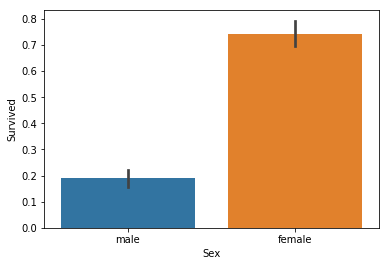

In [41]:
sns.barplot('Sex', 'Survived', data=titanic)
plt.show()

### 9. Create another model predicted survived on fare and sex. Recall that sex is a categorical value and that dummy variables need to be created 

In [37]:
titanic = titanic.join(pd.get_dummies(titanic['Sex'], drop_first = True, prefix='Sex'))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 10. What is the accuracy of this new model? 

In [42]:
model2 = LogisticRegression()
model2.fit(titanic[['Fare','Sex_male']], titanic['Survived'])
print(model2.coef_)
print(model2.intercept_)
accuracy_score(titanic['Survived'], model2.predict(titanic[['Fare','Sex_male']]))

[[ 0.01133287 -2.34491878]]
[0.59348927]


0.7822671156004489